# Analysis of life expectancy in Austria for the year 2019

Data Sources: [Statistik Austria](http://www.statistik-austria.at/web_de/statistiken/menschen_und_gesellschaft/bevoelkerung/sterbetafeln/index.html)  

[GitHub](https://github.com/thomashon/visualization-life-expectancy-austria-2019)

This Notebook follows [Ben Fry's basic Data Visualization Process](https://www.dashingd3js.com/the-data-visualization-process):

1. Acquire
2. Parse
3. Filter
4. Mine
5. Represent
6. Refine (this notebook contains the final version, see the GitHub commits for the full history)
7. Interact

## 1. Acquire
### Import of Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Import Dataset

In [3]:
try:
    df = pd.read_csv('data-life-expectancy-austria-2019.csv')
except:
    github_csv = 'https://raw.githubusercontent.com/thomashon/visualization-life-expectancy-austria-2019/master/data-life-expectancy-austria-2019.csv'
    df = pd.read_csv(github_csv)
    
df.head()

,region,gender,current_age,mortality_probability,alive_peers,die_this_year,years_to_live,stationary_current_age,stationary
0,burgenland,m,0,0.004371,100000.000000,437.062937,79.020671,99608.391608,7.902067e+06
1,burgenland,m,1,0.000790,99562.937063,78.667012,78.367101,99523.603557,7.802459e+06
2,burgenland,m,2,0.000000,99484.270051,0.000000,77.428674,99484.270051,7.702935e+06
3,burgenland,m,3,0.000000,99484.270051,0.000000,76.428674,99484.270051,7.603451e+06
4,burgenland,m,4,0.000000,99484.270051,0.000000,75.428674,99484.270051,7.503967e+06


## 2. Parse
### Droping unneccessary columns

In [3]:
df.drop(['die_this_year', 'stationary_current_age', 'stationary'], axis=1, inplace=True)
df.head()

,region,gender,current_age,mortality_probability,alive_peers,years_to_live
0,burgenland,m,0,0.004371,100000.000000,79.020671
1,burgenland,m,1,0.000790,99562.937063,78.367101
2,burgenland,m,2,0.000000,99484.270051,77.428674
3,burgenland,m,3,0.000000,99484.270051,76.428674
4,burgenland,m,4,0.000000,99484.270051,75.428674


### Transforming *alive_peers* to percentual basis 1

In [4]:
df.alive_peers = df.alive_peers / 100000
df.head()

,region,gender,current_age,mortality_probability,alive_peers,years_to_live
0,burgenland,m,0,0.004371,1.000000,79.020671
1,burgenland,m,1,0.000790,0.995629,78.367101
2,burgenland,m,2,0.000000,0.994843,77.428674
3,burgenland,m,3,0.000000,0.994843,76.428674
4,burgenland,m,4,0.000000,0.994843,75.428674


### Renaming columns

In [5]:
df.rename({'mortality_probability': 'mortality_this_year'}, axis=1, inplace=True)
df.head()

,region,gender,current_age,mortality_this_year,alive_peers,years_to_live
0,burgenland,m,0,0.004371,1.000000,79.020671
1,burgenland,m,1,0.000790,0.995629,78.367101
2,burgenland,m,2,0.000000,0.994843,77.428674
3,burgenland,m,3,0.000000,0.994843,76.428674
4,burgenland,m,4,0.000000,0.994843,75.428674


### Creating new column *mortality_dist*

In [6]:
df['mortality_dist'] = df.mortality_this_year * df.alive_peers
df.head()

,region,gender,current_age,mortality_this_year,alive_peers,years_to_live,mortality_dist
0,burgenland,m,0,0.004371,1.000000,79.020671,0.004371
1,burgenland,m,1,0.000790,0.995629,78.367101,0.000787
2,burgenland,m,2,0.000000,0.994843,77.428674,0.000000
3,burgenland,m,3,0.000000,0.994843,76.428674,0.000000
4,burgenland,m,4,0.000000,0.994843,75.428674,0.000000


### Creating new column *dead_peers*

In [7]:
df['dead_peers'] = 1 - df.alive_peers
df.head()

,region,gender,current_age,mortality_this_year,alive_peers,years_to_live,mortality_dist,dead_peers
0,burgenland,m,0,0.004371,1.000000,79.020671,0.004371,-2.220446e-16
1,burgenland,m,1,0.000790,0.995629,78.367101,0.000787,4.370629e-03
2,burgenland,m,2,0.000000,0.994843,77.428674,0.000000,5.157299e-03
3,burgenland,m,3,0.000000,0.994843,76.428674,0.000000,5.157299e-03
4,burgenland,m,4,0.000000,0.994843,75.428674,0.000000,5.157299e-03


### Creating new column (life-)*expectancy*

In [8]:
df['expectancy'] = df.current_age + df.years_to_live
df.head()

,region,gender,current_age,mortality_this_year,alive_peers,years_to_live,mortality_dist,dead_peers,expectancy
0,burgenland,m,0,0.004371,1.000000,79.020671,0.004371,-2.220446e-16,79.020671
1,burgenland,m,1,0.000790,0.995629,78.367101,0.000787,4.370629e-03,79.367101
2,burgenland,m,2,0.000000,0.994843,77.428674,0.000000,5.157299e-03,79.428674
3,burgenland,m,3,0.000000,0.994843,76.428674,0.000000,5.157299e-03,79.428674
4,burgenland,m,4,0.000000,0.994843,75.428674,0.000000,5.157299e-03,79.428674


### Transforming *region* and *gender* to category

In [9]:
df.region = df.region.astype('category')
df.gender = df.gender.astype('category')
df.head()

,region,gender,current_age,mortality_this_year,alive_peers,years_to_live,mortality_dist,dead_peers,expectancy
0,burgenland,m,0,0.004371,1.000000,79.020671,0.004371,-2.220446e-16,79.020671
1,burgenland,m,1,0.000790,0.995629,78.367101,0.000787,4.370629e-03,79.367101
2,burgenland,m,2,0.000000,0.994843,77.428674,0.000000,5.157299e-03,79.428674
3,burgenland,m,3,0.000000,0.994843,76.428674,0.000000,5.157299e-03,79.428674
4,burgenland,m,4,0.000000,0.994843,75.428674,0.000000,5.157299e-03,79.428674


## 3. Filter
I am sorting the life expectancy according to the median to represent the visualizations better.

In [10]:
median = df.groupby(["region"])['expectancy'].aggregate(np.median).reset_index().sort_values('expectancy')
median

,region,expectancy
7,vienna,83.284580
2,lower_austria,84.166161
0,burgenland,84.469514
1,carinthia,84.620882
6,upper_austria,84.876366
4,styria,84.884765
8,vorarlberg,85.153971
5,tyrol,85.467511
3,salzburg,85.511621


## 4. Mine
### General description
With the *description method*, we get a closer look at the data.

In [11]:
df.describe()

,current_age,mortality_this_year,alive_peers,years_to_live,mortality_dist,dead_peers,expectancy
count,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1.818000e+03,1818.000000
mean,50.000000,0.042165,0.815263,35.839879,0.009813,1.847367e-01,85.839879
std,29.162781,0.089848,0.289981,25.090530,0.013919,2.899814e-01,5.427070
min,0.000000,0.000000,0.006073,1.753247,0.000000,-2.220446e-16,78.184678
25%,25.000000,0.000365,0.772572,12.304824,0.000362,6.521861e-03,81.424540
50%,50.000000,0.002268,0.972625,33.129373,0.002214,2.737450e-02,84.914248
75%,75.000000,0.025071,0.993478,57.541099,0.014719,2.274280e-01,87.878470
max,100.000000,0.443804,1.000000,85.039605,0.058459,9.939268e-01,102.096646


We can see the quartiles of the different columns. Life expectancy is at least 78 and at most 102 years.

### Percentiles
Perhaps the percentiles of *expectancy* can give us more precise information.

In [12]:
percentiles = []

for region in median.region.unique().to_list():
    
    percentile_low_f = round(np.percentile(df[(df.region == region) & (df.gender == 'f')].expectancy, [2.5][0]), 2)
    percentile_high_f = round(np.percentile(df[(df.region == region) & (df.gender == 'f')].expectancy, [97.5][0]), 2)
    f_iqr = percentile_high_f - percentile_low_f
    
    percentile_low_m = round(np.percentile(df[(df.region == region) & (df.gender == 'm')].expectancy, [2.5][0]), 2)
    percentile_high_m = round(np.percentile(df[(df.region == region) & (df.gender == 'm')].expectancy, [97.5][0]), 2)
    m_iqr = percentile_high_m - percentile_low_m
    
    
    percentile_dict = {
        
        'region': region,
        'f_2.5': percentile_low_f,
        'f_97.5': percentile_high_f,
        'f_iqr': f_iqr,
        
        'm_2.5': percentile_low_m,
        'm_97.5': percentile_high_m,
        'm_iqr': m_iqr
        
        }
    
    
    percentiles.append(percentile_dict)
    
    
df_percentiles = pd.DataFrame(percentiles, columns=['region', 'f_2.5', 'f_97.5', 'f_iqr', 'm_2.5', 'm_97.5', 'm_iqr'])
df_percentiles

,region,f_2.5,f_97.5,f_iqr,m_2.5,m_97.5,m_iqr
0,vienna,83.01,99.93,16.92,78.57,99.54,20.97
1,lower_austria,83.92,99.93,16.01,79.26,99.54,20.28
2,burgenland,84.07,99.93,15.86,79.43,99.54,20.11
3,carinthia,84.29,99.93,15.64,79.02,99.54,20.52
4,upper_austria,84.66,99.93,15.27,79.88,99.54,19.66
5,styria,84.74,99.93,15.19,79.77,99.54,19.77
6,vorarlberg,84.87,99.93,15.06,80.78,99.54,18.76
7,tyrol,85.21,99.93,14.72,80.56,99.54,18.98
8,salzburg,85.26,99.93,14.67,80.62,99.54,18.92


The percentiles show a clear picture. The 95% confidence interval is higher for the federal states in the west than in the east. Let's see if the visual analysis provides a similar picture. For statistical significance, out of box sampling would probably have been useful. For our purposes, however, we are satisfied with the available results.

## 5. Represent
### pair plot
With the pair plot, we get a good overview of much information. Pair plots are generally a good starting point for further investigations.

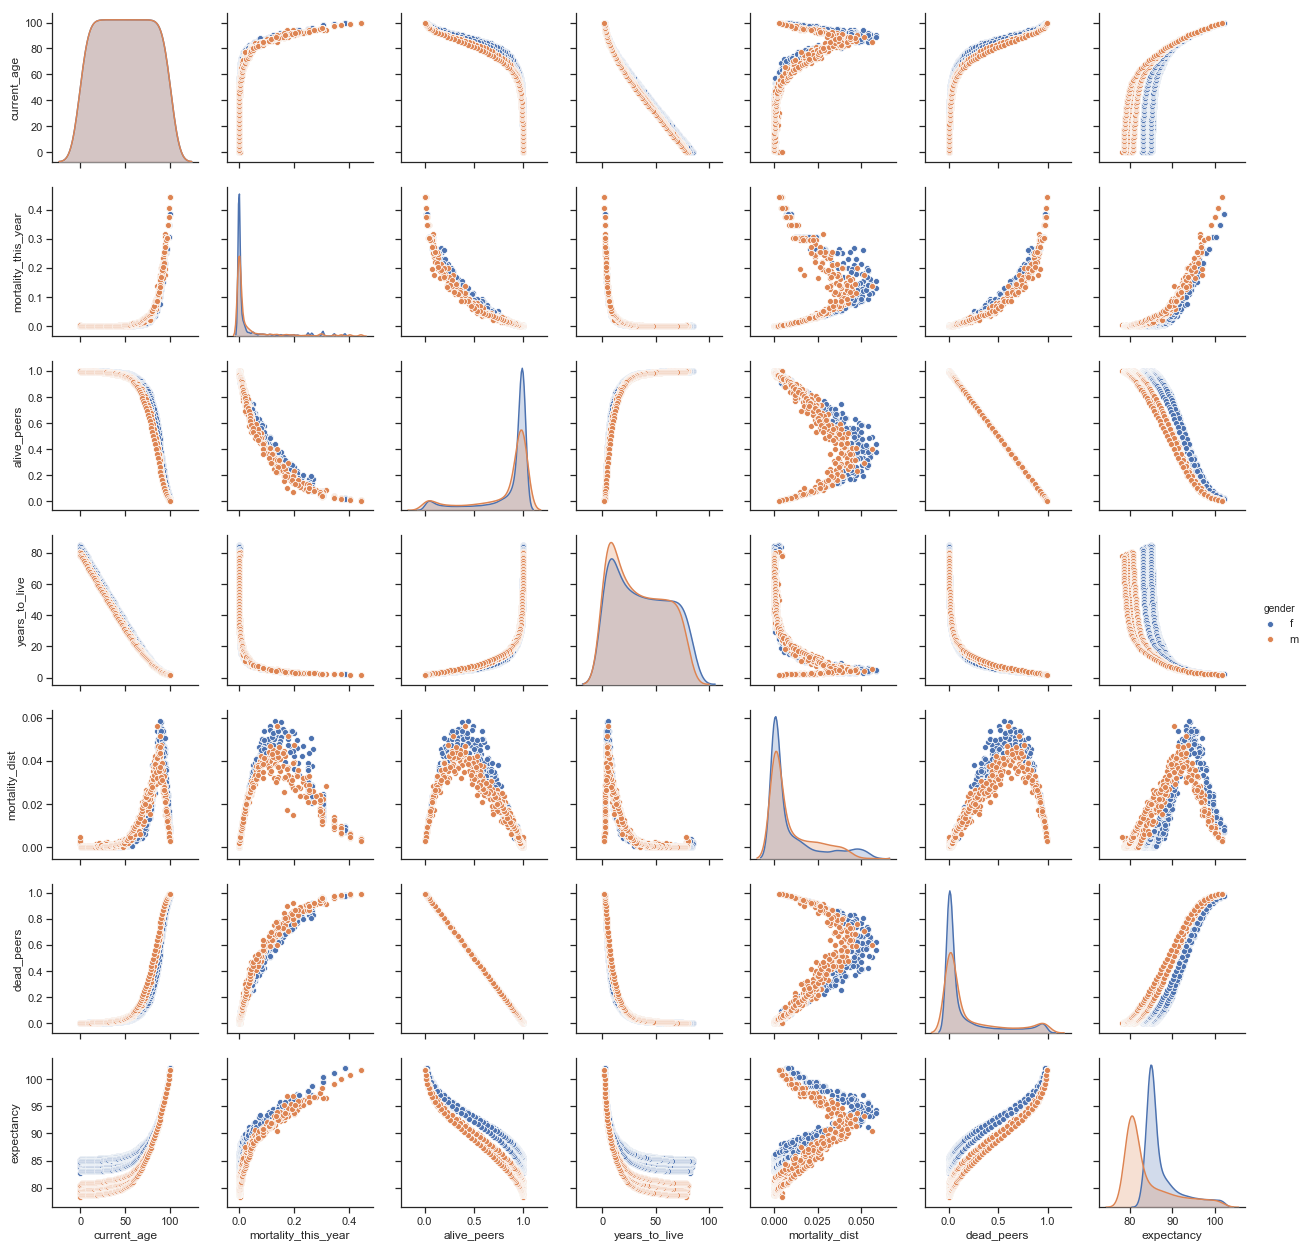

In [13]:
sns.set(style="ticks")
sns.pairplot(df, hue="gender")

It turns out that especially the distribution of the *expectancy* is a good starting point for further investigations.

### Mortality Distribution *gender*
Let's take a closer look at the distribution of *expectancy* compared to the current age.

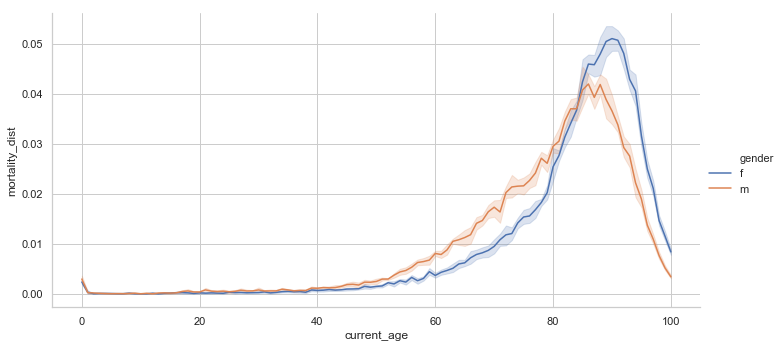

In [14]:
ax = sns.set(style="whitegrid")


ax = sns.relplot(
    x='current_age',
    y='mortality_dist', 
    data=df, 
    kind='line', 
    hue='gender', 
    alpha=1, 
    aspect=2
)

We can see that up to the age of about 40, the mortality rates of both women and men are relatively similar. From 40 to about 85, a gap opens between men and women. At this age, men have a much higher probability of dying. The distribution of women is narrower overall. In other words, mortality takes place in a shorter period than among men.

### Mortality Distribution *regions*
Let's look at the distribution of *expectancy* also concerning the 9 federal states.

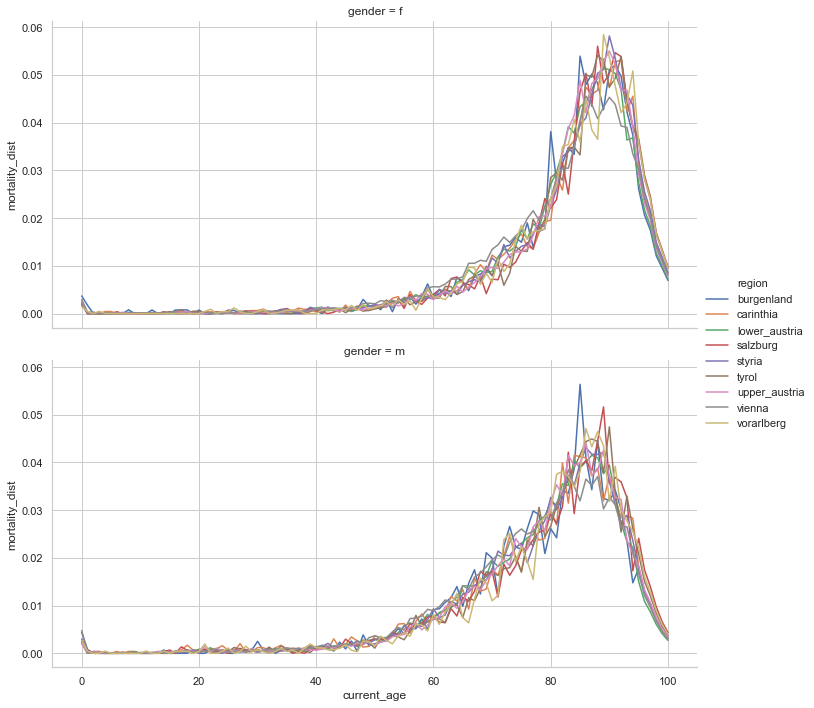

In [15]:
ax = sns.relplot(
    x='current_age', 
    y='mortality_dist', 
    data=df, 
    kind='line', 
    hue='region', 
    row='gender', 
    alpha=1, 
    aspect=2
)

The distribution in relation to the federal states is quite similar. Only Burgenland seems to have some outliers.

### Bar chart *gender* and *region* together
Maybe a bar chart tells us more about our data. It shows the life expectancy for 25-year-olds separated by gender.

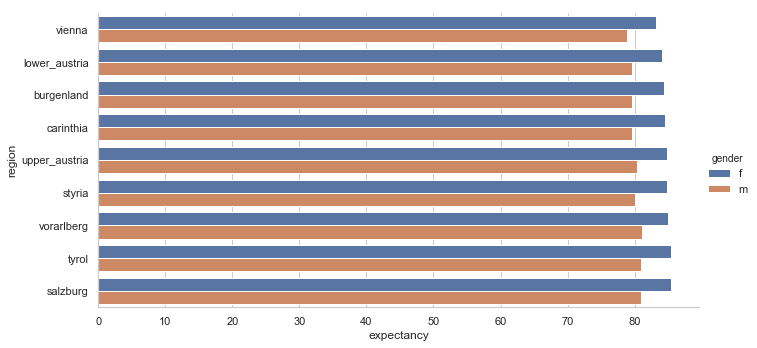

In [16]:
ax = sns.catplot(
    x = 'expectancy', 
    y = 'region', 
    data = df[df.current_age == 25], 
    hue = 'gender', 
    kind = 'bar', 
    aspect = 2, 
     order = median['region']
)

The severe difference between men and women becomes clear with this bar chart.

### Bar chart *gender* and *region* separated
To illustrate the differences between the federal states, a bar chart is shown here, separated according to *gender* and *region*. The life expectancy of a 25-year-old is also shown here.

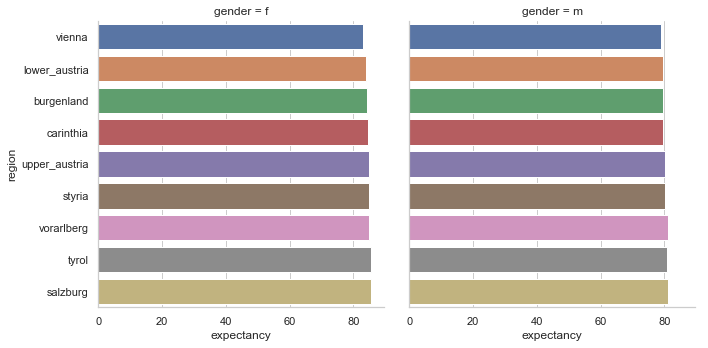

In [17]:
ax = sns.catplot(
    x='expectancy', 
    y='region', 
    data=df[df.current_age == 25], 
    col='gender', 
    kind='bar', 
    aspect=1, 
    order=median['region']
)

It seems that the differences between the federal states are more significant for women than for men.

### Boxplot *gender* and *region* together
Perhaps a box plot diagram can tell us more about the differences in life expectancy between women and men and between the federal states.

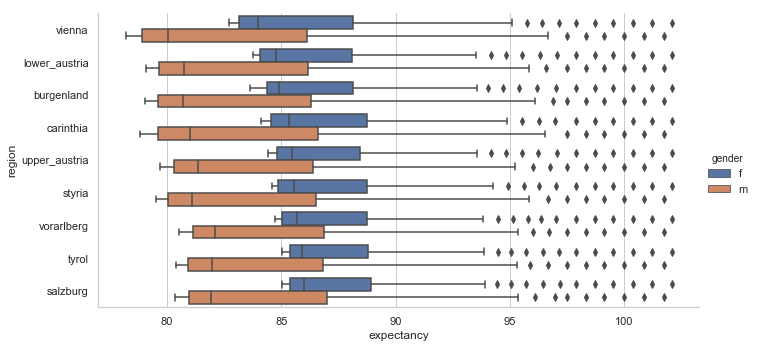

In [18]:
ax = sns.catplot(
    x='expectancy', 
    y='region', 
    data=df, 
    kind='box', 
    hue='gender', 
    aspect=2, 
    order=median['region']
)

The quartiles and the median show a clear picture. Women generally have a higher life expectancy in Austria.

### Boxplot *gender* and *region* separated
Perhaps if we separate by *region*, the difference between the federal states also become more evident.

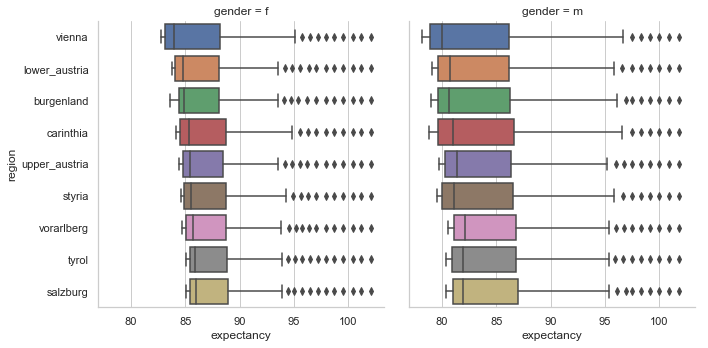

In [19]:
ax = sns.catplot(
    x='expectancy', 
    y='region', 
    data=df, 
    kind='box', 
    col='gender', 
    order=median['region']
)

The quartiles show a clear picture. The difference between city and province is once again evident. In the provinces, life expectancy is higher for both women and men.

## 7. Interact
### Import of the modules

In [20]:
from bokeh.io import show, output_notebook, curdoc, push_notebook
from bokeh.plotting import figure
from bokeh.models import CategoricalColorMapper, HoverTool, ColumnDataSource, Slider, CustomJS
from bokeh.layouts import row, column, widgetbox
from bokeh.palettes import Category10_9
from ipywidgets import interact

### Output to notebook

In [21]:
output_notebook()

Loading BokehJS ...

### bokeh.io
Perhaps further insights can be gained with interactive visualization. With the help of bokeh, complex issues can be viewed from different perspectives.

In [22]:
genders = df.gender.unique().to_list()
color_mapper = CategoricalColorMapper(factors=genders, palette=['#CC8963', '#5975A4'])


regions = median.region.tolist() # the ordered list from above
genders = df.gender.unique().tolist()
age = 25


source = ColumnDataSource(data={'x': df.region[df.current_age==age],
                                'y': df.expectancy[df.current_age==age],
                                'region': df.region[df.current_age==age],
                                'gender': df.gender[df.current_age==age],
                                'age': df.current_age[df.current_age==age],
                                'alive_peers': df.alive_peers[df.current_age==age]
                               })


hover = HoverTool(
    tooltips=[
        ('age', '@age'),
        ('expectancy', '@y'),
        ('region', '@x'),
        ('gender', '@gender'),
        ('alive peers', '@alive_peers')
        ])


p = figure(title="simple circle example", plot_height=300, plot_width=800, y_range=(75,105), x_range=regions,
           background_fill_color='#FFFFFF', tools=[hover, 'pan', 'wheel_zoom'])
r = p.circle('x', 'y', size=20, alpha=0.7, color=dict(field='gender', transform=color_mapper), source=source)


def update(age=25):
#     r.data_source.data['x'] = age
    r.data_source.data['y'] = df.expectancy[df.current_age==age]
    r.data_source.data['age'] = df.current_age[df.current_age==age]
    r.data_source.data['alive_peers'] = df.alive_peers[df.current_age==age]
    push_notebook()


show(p, notebook_handle=True)
interact(update, age=(0,100))

interactive(children=(IntSlider(value=25, description='age'), Output()), _dom_classes=('widget-interact',))

<function __main__.update(age=25)>

Again blue circles represent women and orange circles men.

It may seem contradictory that life expectancy is higher for older people than for young people. However, we must not forget that someone who is 25 years old must be the same age as someone who is 80 before they can get any older.

As we glide over the circles, we see additional information such as the exact (life-) *expectancy* or the number of living people of the same age (*alive_peers*).